In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import my_functions as mf
from matplotlib.colors import LogNorm
from matplotlib import cm
from scipy.ndimage import gaussian_filter

In [2]:
%matplotlib inline

In [3]:
xmin = 1.
xmax = 110.
xn = 21
x = np.linspace(xmin,xmax,xn)

ymin = 55.
ymax = 220.
yn = 21
y = np.linspace(ymin,ymax,yn)

zmin = 15
zmax = 251
zn =  21
z = np.linspace(zmin,zmax,zn)

X,Y,Z = np.meshgrid(x,y,z)

rho_m = 100*X*Y*Z/(X**2 + Y**2 + Z**2)


In [4]:
xx,yy,zz,x1,y1,z1,rho = mf.select_area(0,100,55,220,15,250,x,y,z,rho_m)

In [5]:
rho1 = np.ravel(rho)
lx,ly,lz = rho.shape
print(lx,ly,lz)

18 20 20


In [6]:
x1min = np.min(x1)
y1min = np.min(y1)
z1min = np.min(z1)

x1max = np.max(x1)
y1max = np.max(y1)
z1max = np.max(z1)

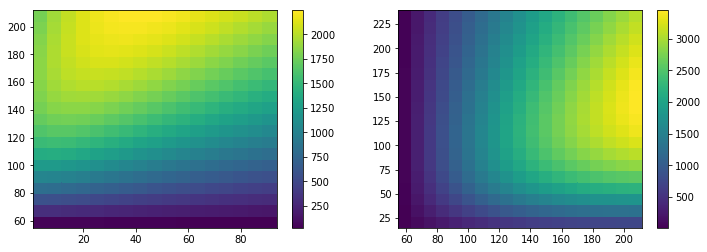

In [7]:
my,mx = np.meshgrid(y1,x1)
mz1,my1 = np.meshgrid(z1,y1)

z_plot = np.argmin(np.abs(z-50))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.pcolor(mx,my,rho[:,:,z_plot])
plt.colorbar()

plt.subplot(1,2,2)
plt.pcolor(my1,mz1,rho[5,:,:])

plt.colorbar()
plt.show()

In [8]:
# Control points

x1n = 25
y1n = 25
z1n = 25

c1 = np.linspace(xmin,xmax,x1n)+0.5
c2 = np.linspace(ymin,ymax,y1n)+0.5
c3 = np.linspace(zmin,zmax,z1n)+0.5

Xc,Yc,Zc = np.meshgrid(c1,c2,c3)


xc = np.ravel(Xc)
yc = np.ravel(Yc)
zc = np.ravel(Zc)

ln = xc.size

In [9]:
xc.size,yc.size,zc.size

(15625, 15625, 15625)

In [10]:
xx.size,yy.size,zz.size

(7200, 7200, 7200)

In [11]:
# #Interpolation points

dx1 = (x1[1:]+x1[:-1])/2
dy1 = (y1[1:]+y1[:-1])/2
dz1 = (z1[1:]+z1[:-1])/2

x0n = len(dx1)
y0n = len(dy1)
z0n = len(dz1)

Y0,X0,Z0 = np.meshgrid(dy1,dx1,dz1)


x0 = np.ravel(X0)
y0 = np.ravel(Y0)
z0 = np.ravel(Z0)

rho_0real = 100*X0*Y0*Z0/(X0**2 + Y0**2 + Z0**2)

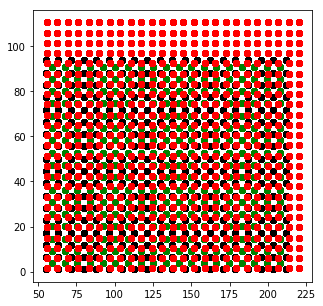

In [12]:
plt.figure(figsize=(5,5))
plt.plot(yy,xx,'ko')
plt.plot(y0,x0,'go')
plt.plot(yc,xc,'ro')

In [22]:
# Calculate interpolation function
t = 0.0002
A = mf.calc_A_by_column(xx,yy,zz,xc,yc,zc,1,t)

In [23]:
H = np.dot(A,A.T)

In [24]:
h0 = np.trace(H)/ln

In [25]:
mu = 1E-18*h0
print( mu)

1.838232565933319e-15


In [26]:
w = np.linalg.solve(H,rho1)

In [27]:
p = np.dot(A.T,w)

In [28]:
# Interpolate funtion rho in points x0, y0, z0

A0 = mf.calc_A_by_column(x0,y0,z0,xc,yc,zc,1,t)

In [29]:
# Interpolated matrix
rho0 = np.dot(A0,p)
rho0_m = rho0.reshape((x0n,y0n,z0n))

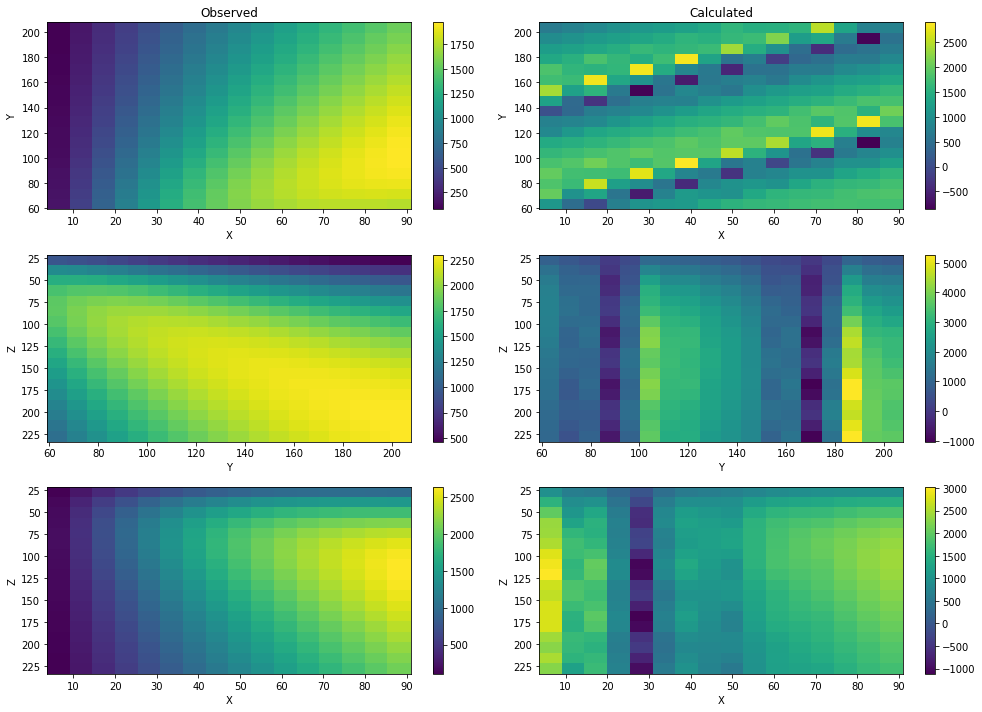

In [30]:
mf.plot_function_6sub(50,70,50,dx1,dy1,dz1,dx1,dy1,dz1,rho_0real,rho0_m)